In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



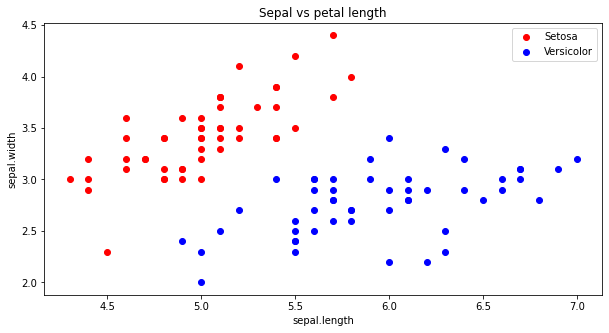

In [2]:
df = pd.read_csv("iris.csv")
t = []
X = []

dic_variety = {}
dic_variety["Setosa"] = 1
dic_variety["Versicolor"] = -1

for i in range(0,len(df)):
    if not df["variety"][i] == "Virginica":
        t.append(dic_variety[df["variety"][i]])
        X.append([df["sepal.length"][i],df["sepal.width"][i]])
    
X= np.array(X)
t = np.array(t)

plt.figure(figsize=(10,5))

plt.plot(X[:,0][0:50],X[:,1][0:50],'ro',label="Setosa")

plt.plot(X[:,0][50:],X[:,1][50:],'bo',label="Versicolor")
        
plt.legend()
plt.title("Sepal vs petal length")
plt.xlabel("sepal.length")
plt.ylabel("sepal.width")

plt.show()

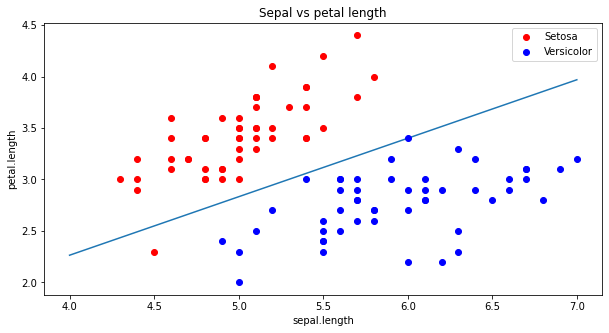

In [5]:
def perceptron(X,y,num_iter):
   
    w=np.ones((X.shape[1],1))
    b=1
    learning_rate=1
    Round=0
    misclassified=1
   
    misclassified_per_epoch = []
    while not(misclassified == 0) and  num_iter>0:
        misclassified = 0
        for i in range(0,len(X)):
          
            if y[i] * (np.dot(w.T,X[i].T)+b)<0:
                w+=learning_rate*np.dot(X[i].reshape(2,1),y[i])
           
                misclassified+=1
        misclassified_per_epoch.append(misclassified)
        num_iter-=1
    return w,misclassified_per_epoch

n_iter =1000
w,misclassified_per_epoch  =perceptron(X,t,n_iter)

plt.figure(figsize=(10,5))

x_points = np.linspace(4,7,10)
y_ = -(w[0]*x_points + 1)/w[1]
plt.plot(x_points, y_)


plt.plot(X[:,0][0:50],X[:,1][0:50],'ro',label="Setosa")

plt.plot(X[:,0][50:],X[:,1][50:],'bo',label="Versicolor")
        
plt.legend()
plt.title("Sepal vs petal length")
plt.xlabel("sepal.length")
plt.ylabel("petal.length")
plt.show()


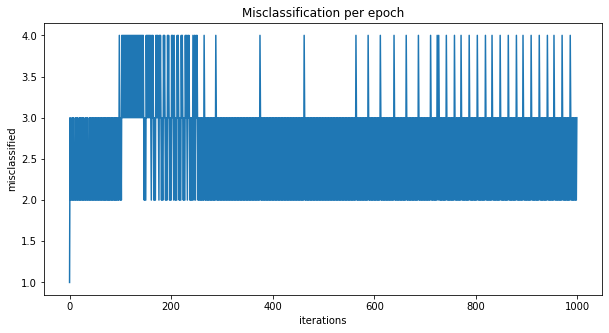

In [6]:
plt.figure(figsize=(10,5))
plt.plot(range(0,n_iter),misclassified_per_epoch)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.title("Misclassification per epoch")
plt.show()

source 
https://towardsdatascience.com/an-introduction-to-perceptron-algorithm-40f2ab4e2099

https://towardsdatascience.com/perceptron-and-its-implementation-in-python-f87d6c7aa428